In [ ]:
# tf.estimators

# types

# Linear classifier
# Linear Regrressor
  

# TF Estimator

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x_data = np.linspace(0.0, 10.0, 1000000)
noise = np.random.randn(len(x_data))

In [3]:
x_data

array([0.000000e+00, 1.000001e-05, 2.000002e-05, ..., 9.999980e+00,
       9.999990e+00, 1.000000e+01])

In [4]:
#y = mx + b
#b = 5

In [5]:
y_true = (0.5 * x_data) + 5 + noise

In [6]:
x_df = pd.DataFrame(data=x_data, columns = ['x_data'])
y_df = pd.DataFrame(data=y_true, columns = ['y'])
y_df.head()

,y
0,4.742327
1,4.415495
2,6.031326
3,4.883925
4,5.506540


In [7]:
my_data = pd.concat([x_df, y_df], axis = 1)
my_data.head()

,x_data,y
0,0.00000,4.742327
1,0.00001,4.415495
2,0.00002,6.031326
3,0.00003,4.883925
4,0.00004,5.506540


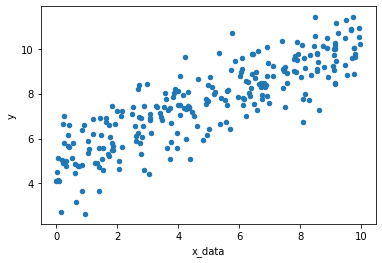

In [8]:
my_data.sample(n = 250).plot(kind = "scatter", x ="x_data", y ="y")  # sample no = 250 and .plot is plotting those choosen samples 

In [9]:
batch_size = 8
m = tf.Variable(0.5)
b = tf.Variable(1.0)

In [10]:
xph = tf.placeholder(tf.float32, [batch_size])  # x_placeholder
yph = tf.placeholder(tf.float32, [batch_size])  # y_placeholder

In [11]:
y_model = m * xph + b

In [12]:
# calc lose funct
error = tf.reduce_sum(tf.square(yph - y_model))
# adjusting weights
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.001)
train = optimizer.minimize(error)

In [13]:
init = tf.global_variables_initializer()

In [14]:
with tf.Session() as sess:
    sess.run(init)
    batches = 500
    # batches matlab 100000 data me sy har dfa 8 random points uthen gy or model ka input bny gen har iteration me 
    for i in range(batches):
        
        rand_ind = np.random.randint(len(x_data), size=batch_size)
        feed = {xph : x_data[rand_ind], yph: y_true[rand_ind]}
        sess.run(train, feed_dict = feed)
        
    value_m, value_b = sess.run([m, b])
    

In [15]:
value_m

0.6384895

In [16]:
value_b

4.4201107

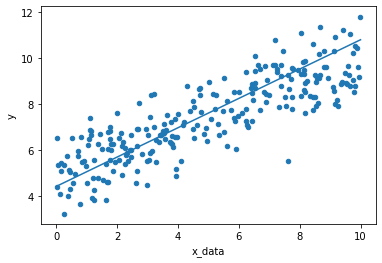

In [17]:
y_hat = x_data * value_m + value_b
my_data.sample(250).plot(kind = "scatter", x= 'x_data', y = "y")
plt.plot(x_data, y_hat)

In [87]:
# Here we are passing the data in the batches 

# TF_ESTIMATOR

In [88]:
feat_cols = [tf.feature_column.numeric_column("x", shape = [1]) ]

In [89]:
estimator = tf.estimator.LinearRegressor(feature_columns = feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\FURQAN~1\\AppData\\Local\\Temp\\tmphv9ss3o9', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000015300001508>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [90]:
from sklearn.model_selection import train_test_split

In [93]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_true, test_size = 0.3, random_state = 101)

In [94]:
print(x_train.shape)

(700000,)


In [95]:
x_test.shape

(300000,)

### tf.estimator api can take inputs from both numpy and pandas

In [97]:
input_func = tf.estimator.inputs.numpy_input_fn({"x" : x_train}, y_train, batch_size = 8, num_epochs = None,
                                               shuffle = True)    # here x is key 

In [98]:
train_input_func = tf.estimator.inputs.numpy_input_fn({"x": x_train}, y_train, batch_size = 8,
                                                     num_epochs = None, shuffle = False )
# they both are same , i.e. they are doing training, 

In [102]:
test_input_func = tf.estimator.inputs.numpy_input_fn({"x" : x_test}, y_test, batch_size = 8, num_epochs = 1000,
                                                     shuffle = False)

In [99]:
# for runing the training

estimator.train(input_fn = input_func, steps= 1000)

Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
Instructions for updating:
Use `tf.cast` instead.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\FURQAN~1\AppData\Local\Temp\tmphv9ss3o9\model.ckpt.
INFO:tensorflow:loss = 695.9697, step = 1
INFO:tensorflow:global_step/sec: 409.077
INFO:tensorflow:loss = 13.168

In [100]:
# now evaluating our test data or runing our test data
train_metric = estimator.evaluate(input_fn = train_input_func, steps = 1000) # train metric ka matlab hai k now i m checking
# that how well my training performed or what is the accuracy , training metric training data ki accuracy vgera btata hai 

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-10-21T12:52:15Z
INFO:tensorflow:Graph was finalized.
Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from C:\Users\FURQAN~1\AppData\Local\Temp\tmphv9ss3o9\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2019-10-21-12:52:17
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.1194916, global_step = 1000, label/mean = 7.49

In [104]:
test_metric = estimator.evaluate(input_fn = test_input_func, steps = 1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-10-21T13:11:11Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\FURQAN~1\AppData\Local\Temp\tmphv9ss3o9\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2019-10-21-13:11:13
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.1490395, global_step = 1000, label/mean = 7.488516, loss = 9.192316, prediction/mean = 7.2760563
INFO:tensorflow:Saving 'checkpoint_p

In [106]:
print("Training DATA metrics")
print(train_metric)


Training DATA metrics
{'average_loss': 1.1194916, 'label/mean': 7.4914093, 'loss': 8.955933, 'prediction/mean': 7.2979307, 'global_step': 1000}


In [107]:
print("EVAL or TEST metrics")
print(test_metric)

EVAL or TEST metrics
{'average_loss': 1.1490395, 'label/mean': 7.488516, 'loss': 9.192316, 'prediction/mean': 7.2760563, 'global_step': 1000}


In [108]:
# now i m predicting my own data
# given some x_value what will be its corresponding y label according to model
brand_new_data = np.linspace(0, 10, 10)
input_fn_predict = tf.estimator.inputs.numpy_input_fn({"x" : brand_new_data}, shuffle = False)

In [111]:
# instead of train or evaluate i will predict my data by giving x_values

list(estimator.predict(input_fn = input_fn_predict) )

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\FURQAN~1\AppData\Local\Temp\tmphv9ss3o9\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'predictions': array([4.2696705], dtype=float32)},
 {'predictions': array([4.9423146], dtype=float32)},
 {'predictions': array([5.614959], dtype=float32)},
 {'predictions': array([6.2876034], dtype=float32)},
 {'predictions': array([6.9602475], dtype=float32)},
 {'predictions': array([7.6328917], dtype=float32)},
 {'predictions': array([8.305536], dtype=float32)},
 {'predictions': array([8.97818], dtype=float32)},
 {'predictions': array([9.650825], dtype=float32)},
 {'predictions': array([10.323469], dtype=float32)}]

In [113]:
# for ploating our predictions 

predictions = []

for pred in estimator.predict(input_fn = input_fn_predict):
    predictions.append(pred["predictions"])  # in pred["prediction"], prediction is the key value that will return array value

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\FURQAN~1\AppData\Local\Temp\tmphv9ss3o9\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [114]:
predictions

[array([4.2696705], dtype=float32),
 array([4.9423146], dtype=float32),
 array([5.614959], dtype=float32),
 array([6.2876034], dtype=float32),
 array([6.9602475], dtype=float32),
 array([7.6328917], dtype=float32),
 array([8.305536], dtype=float32),
 array([8.97818], dtype=float32),
 array([9.650825], dtype=float32),
 array([10.323469], dtype=float32)]

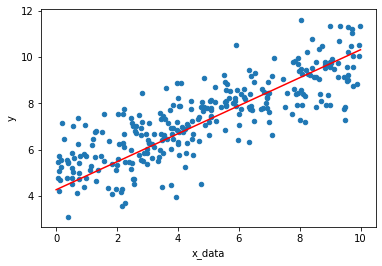

In [115]:
my_data.sample(n = 300).plot(kind = "scatter", x="x_data", y = "y")
plt.plot(brand_new_data, predictions, "r")

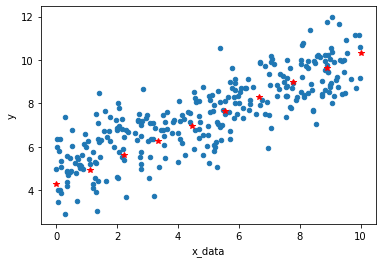

In [117]:
my_data.sample(n = 300).plot(kind = "scatter", x="x_data", y = "y")
plt.plot(brand_new_data, predictions, "r*")